<a href="https://colab.research.google.com/github/Aayush2799/Prodigy_P2/blob/main/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MountDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/Prodigy

/content/drive/MyDrive/Prodigy


Importing necessary libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Loading the data

In [ ]:
tr_df = pd.read_csv('/content/drive/MyDrive/Prodigy/P2/train.csv')
te_df = pd.read_csv('/content/drive/MyDrive/Prodigy/P2/test.csv')

Now we will start with the data cleaning.

First we need to fill the missing values in Age column with median age in train dataset


In [ ]:
tr_df['Age'].fillna(tr_df['Embarked'].mode()[0], inplace=True)

Now we need to drop the Cabin column because the column has too many missing values which is not useful for our project.

In [ ]:
tr_df.drop(columns=['Cabin'], inplace=True)

Now, we need to fill the missing values in Embarked with mode

In [ ]:
tr_df['Embarked'].fillna(tr_df['Embarked'].mode()[0], inplace=True)

Feature Enngineering

Now, we need to encode the SEX column as
male -> 0 , female -> 1

In [ ]:
tr_df['Sex'] = tr_df['Sex'].map({'male' : 0, 'female': 1})


In [ ]:
# One-hot encode the 'Embarked' column
# train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)


Now, we will extract titles from Name title

In [ ]:
tr_df['Title'] = tr_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

Now, we need to simplify the Title categories.

In [ ]:
tr_df['Title'] = tr_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
tr_df['Ttile'] = tr_df['Title'].replace('Mlle', 'Miss')
tr_df['Ttile'] = tr_df['Title'].replace('Ms', 'Miss')
tr_df['Ttile'] = tr_df['Title'].replace('Mme', 'Mrs')

We will encode the titles now

In [ ]:
tr_df = pd.get_dummies(tr_df, columns=['Title'], drop_first=True)

Now, we will create a family size feature

In [ ]:
tr_df['FamilySize'] = tr_df['SibSp'] + tr_df['Parch'] + 1

Columns Name and Ticket will not be needed for Analysis, Therefore we will drop them

In [ ]:
tr_df.drop(columns=['Name','Ticket'], inplace=True)

 We will Check DataFrame columns and data types and ensure Age and Fare columns are present and convert them to numeric

In [ ]:
print(tr_df.columns)
print(tr_df.head())

if 'Age' in tr_df.columns:
    tr_df['Age'] = pd.to_numeric(tr_df['Age'], errors='coerce')
else:
    print("Column 'Age' not found in DataFrame")

if 'Fare' in tr_df.columns:
    tr_df['Fare'] = pd.to_numeric(tr_df['Fare'], errors='coerce')
else:
    print("Column 'Fare' not found in DataFrame")


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Ttile', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rare', 'FamilySize'],
      dtype='object')
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  \
0            1         0       3    0  22.0      1      0   7.2500        S   
1            2         1       1    1  38.0      1      0  71.2833        C   
2            3         1       3    1  26.0      0      0   7.9250        S   
3            4         1       1    1  35.0      1      0  53.1000        S   
4            5         0       3    0  35.0      0      0   8.0500        S   

  Ttile  Title_Miss  Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  \
0    Mr       False       False      False      True      False     False   
1   Mrs       False       False      False     False       True     False   
2  Miss        True       False      False    

Lets start with Vizualization now


First, we will Visualize the distribution of numerical features

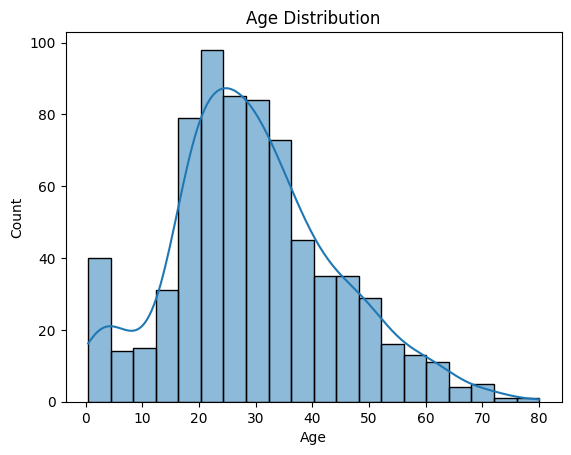

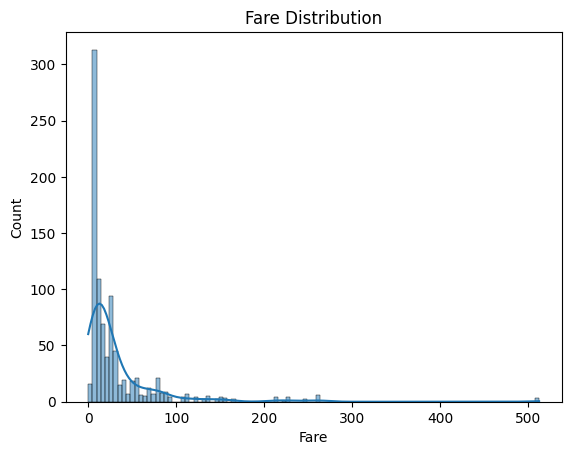

In [ ]:
sns.histplot(tr_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(tr_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

Now, we will analyze the survival rate by 3 features,
Pclass,
Embarked,
Sex.


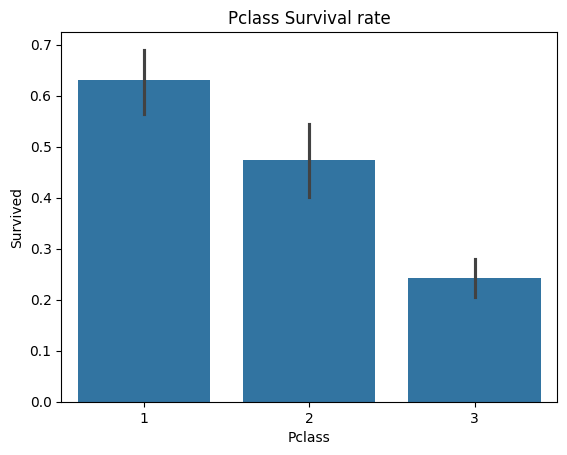

In [ ]:
# Survival rate by Pclass

sns.barplot(x='Pclass', y='Survived', data=tr_df)
plt.title('Pclass Survival rate')
plt.show()

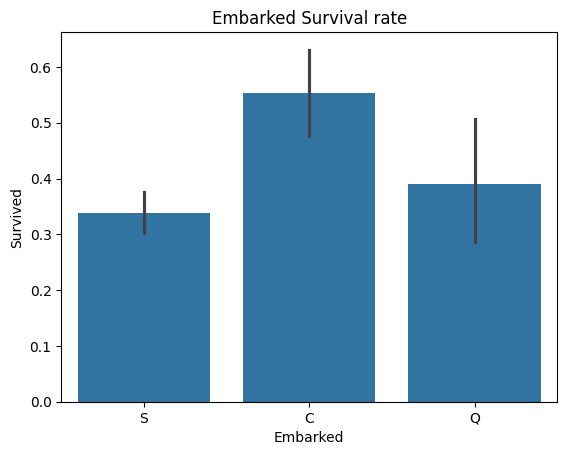

In [ ]:
# Survival rate by Embarked

sns.barplot(x='Embarked', y='Survived', data=tr_df)
plt.title('Embarked Survival rate')
plt.show()

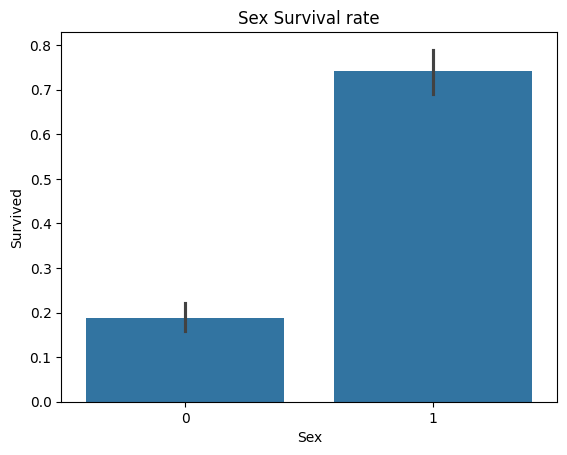

In [ ]:
# Survival rate by Sex

sns.barplot(x='Sex', y='Survived', data=tr_df)
plt.title('Sex Survival rate')
plt.show()

Now, we can investigate the correlations between features and survival

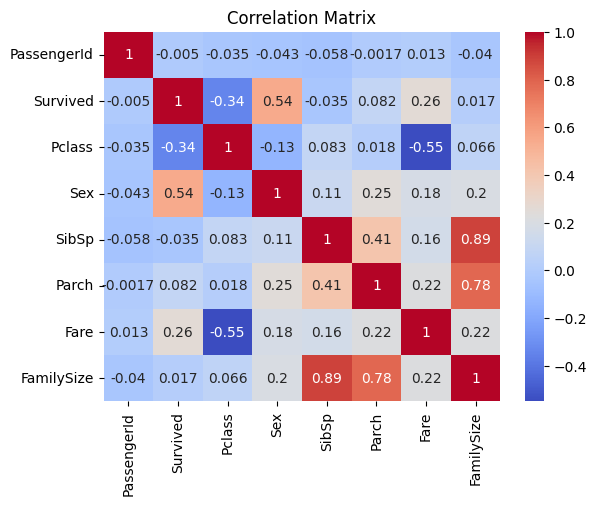

In [ ]:
corr_matrix = tr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()